In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir /content/drive/MyDrive/fruitdatasets
%cd /content/drive/MyDrive/fruitdatasets

/content/drive/MyDrive/fruitdatasets


In [ ]:
%cd /content/drive/MyDrive/fruitdatasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3aZ02cnqezSfrnWc00jG")
project = rf.workspace("123-by53k").project("fruit-sjnav")
version = project.version(3)
dataset = version.download("yolov8")

/content/drive/MyDrive/fruitdatasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
   

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to fruit-3 in yolov8:: 100%|██████████| 1072/1072 [00:07<00:00, 138.25it/s]


In [ ]:
%cd /content/drive/MyDrive/fruitdatasets

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=240 plots=True

/content/drive/MyDrive/fruitdatasets
100% 21.5M/21.5M [00:00<00:00, 170MB/s]
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/fruitdatasets/fruit-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=240, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [ ]:
!ls /content/drive/MyDrive/fruitdatasets/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1713198571.946bd33fe52c.1523.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1160.jpg  val_batch1_pred.jpg
labels.jpg					    train_batch1161.jpg  weights
P_curve.png					    train_batch1162.jpg


/content/drive/MyDrive/fruitdatasets


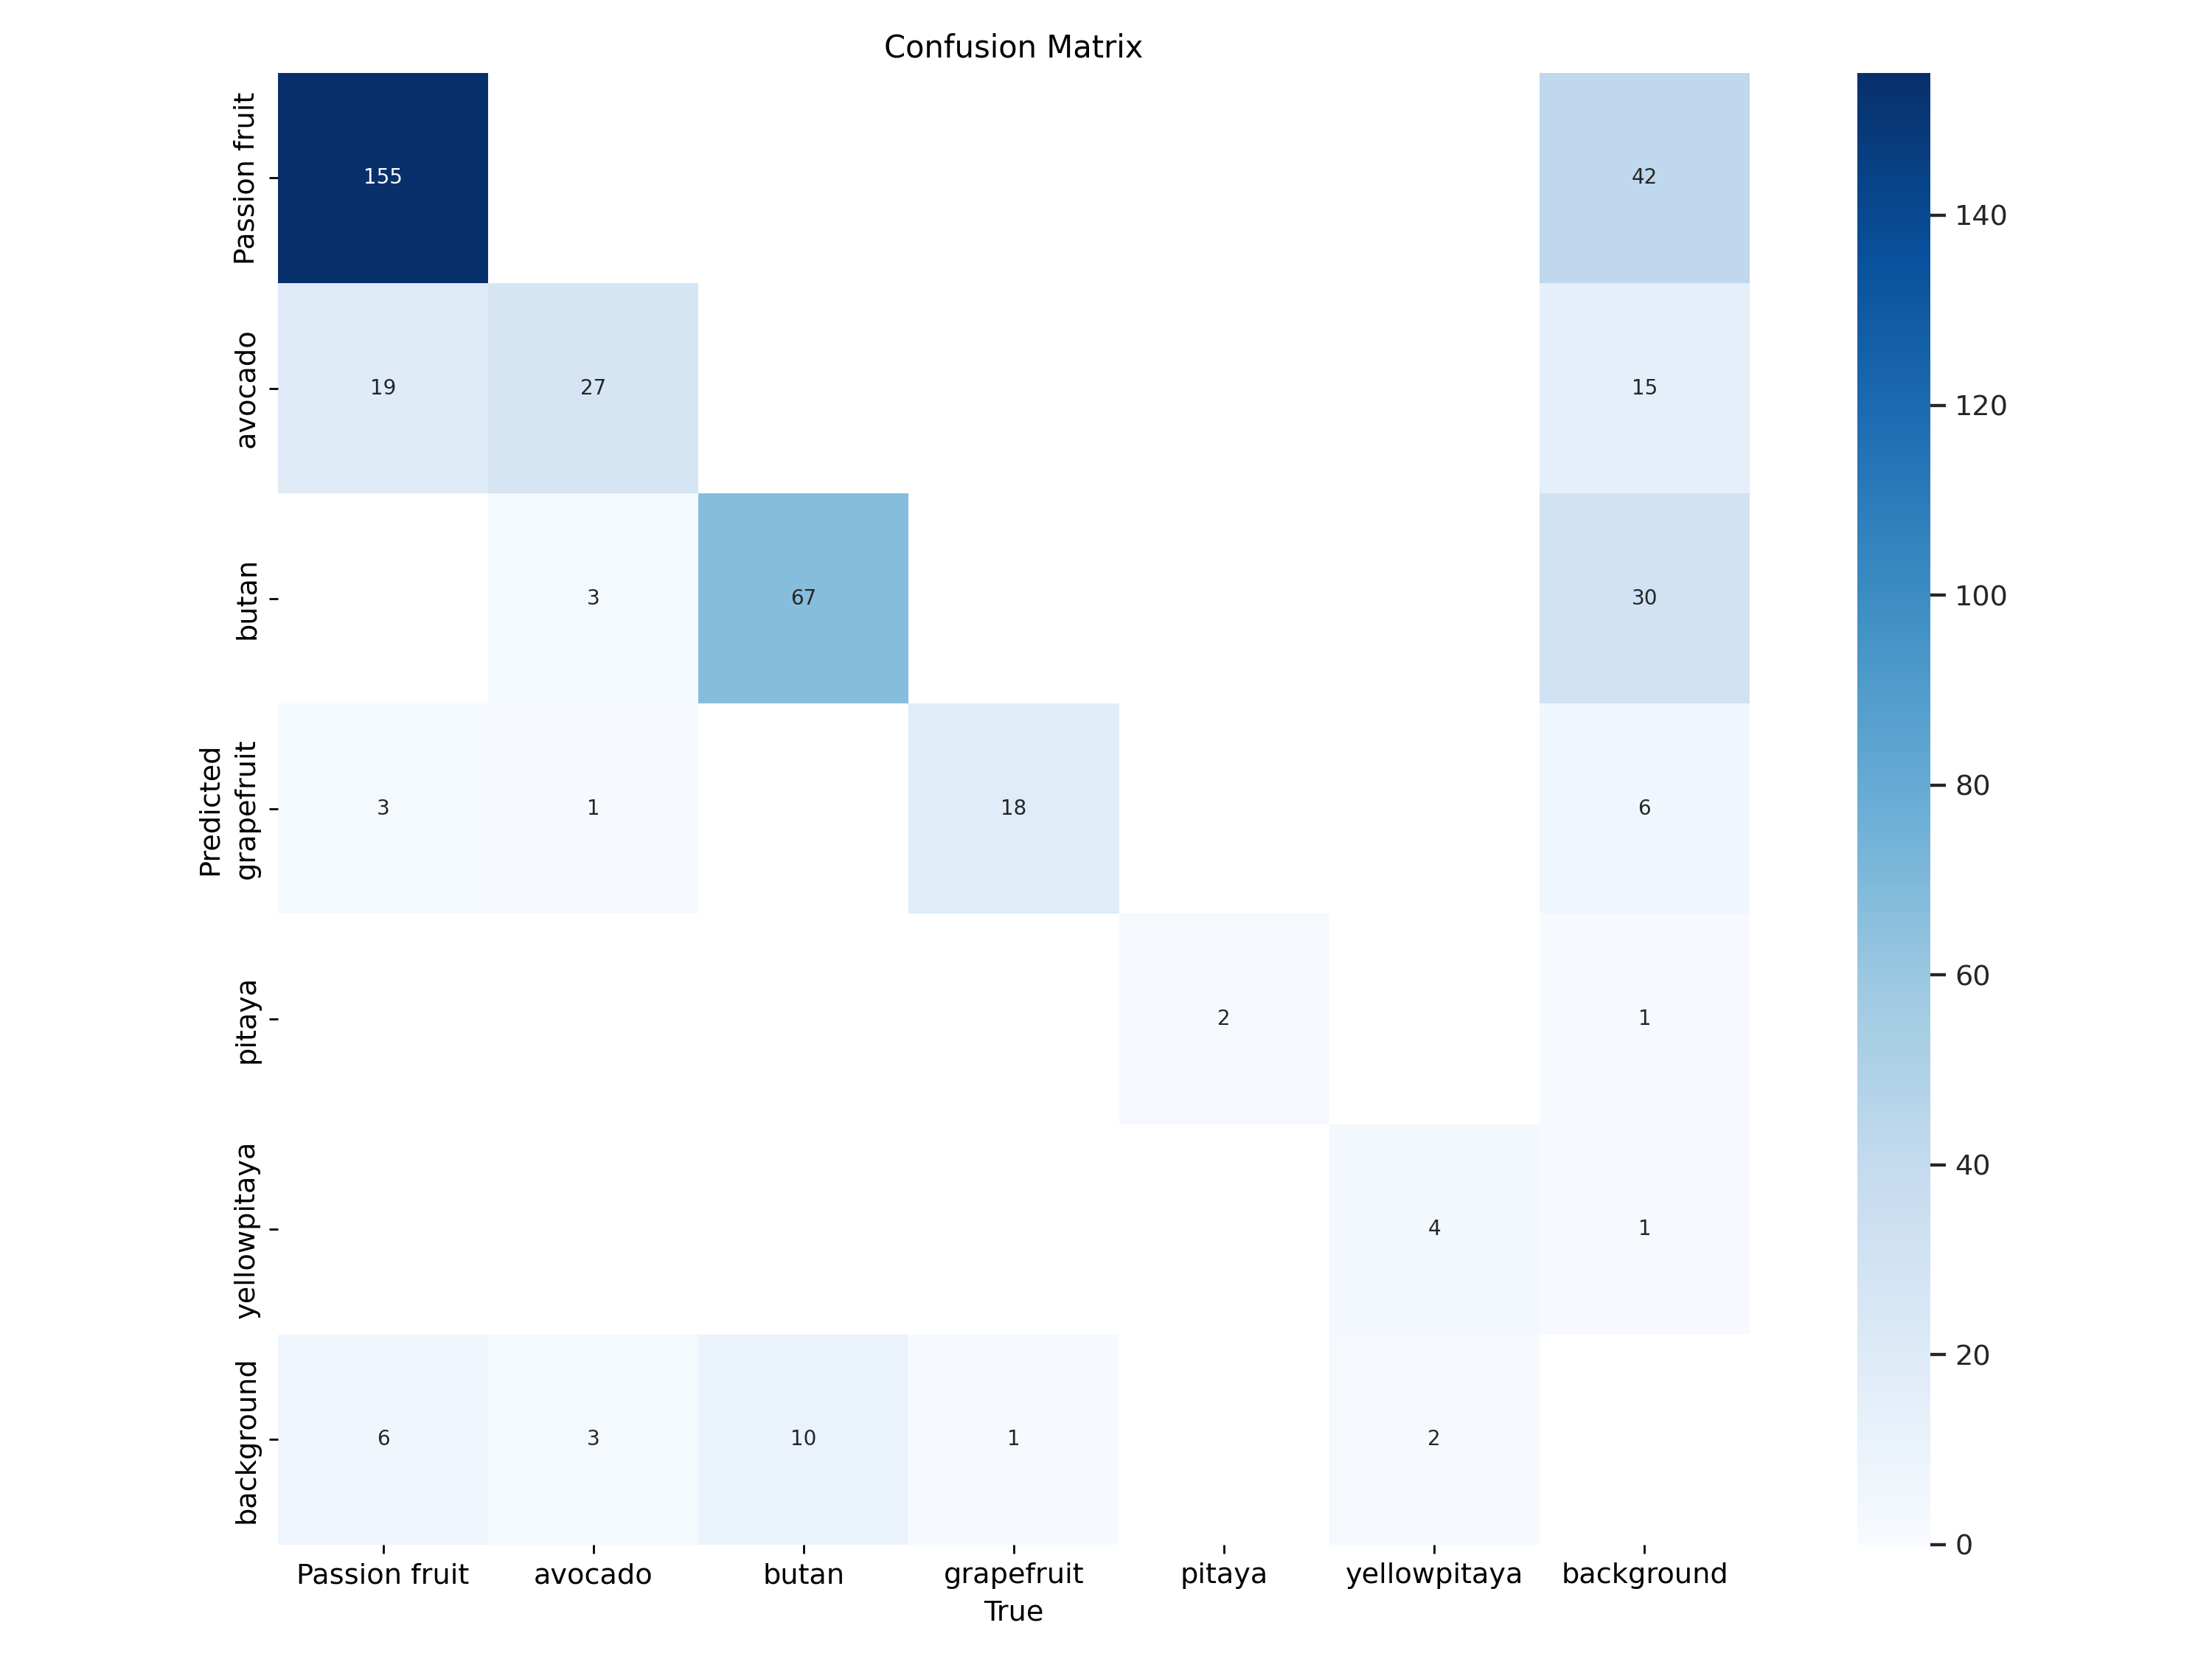

In [ ]:
%cd /content/drive/MyDrive/fruitdatasets
Image(filename=f'/content/drive/MyDrive/fruitdatasets/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/fruitdatasets


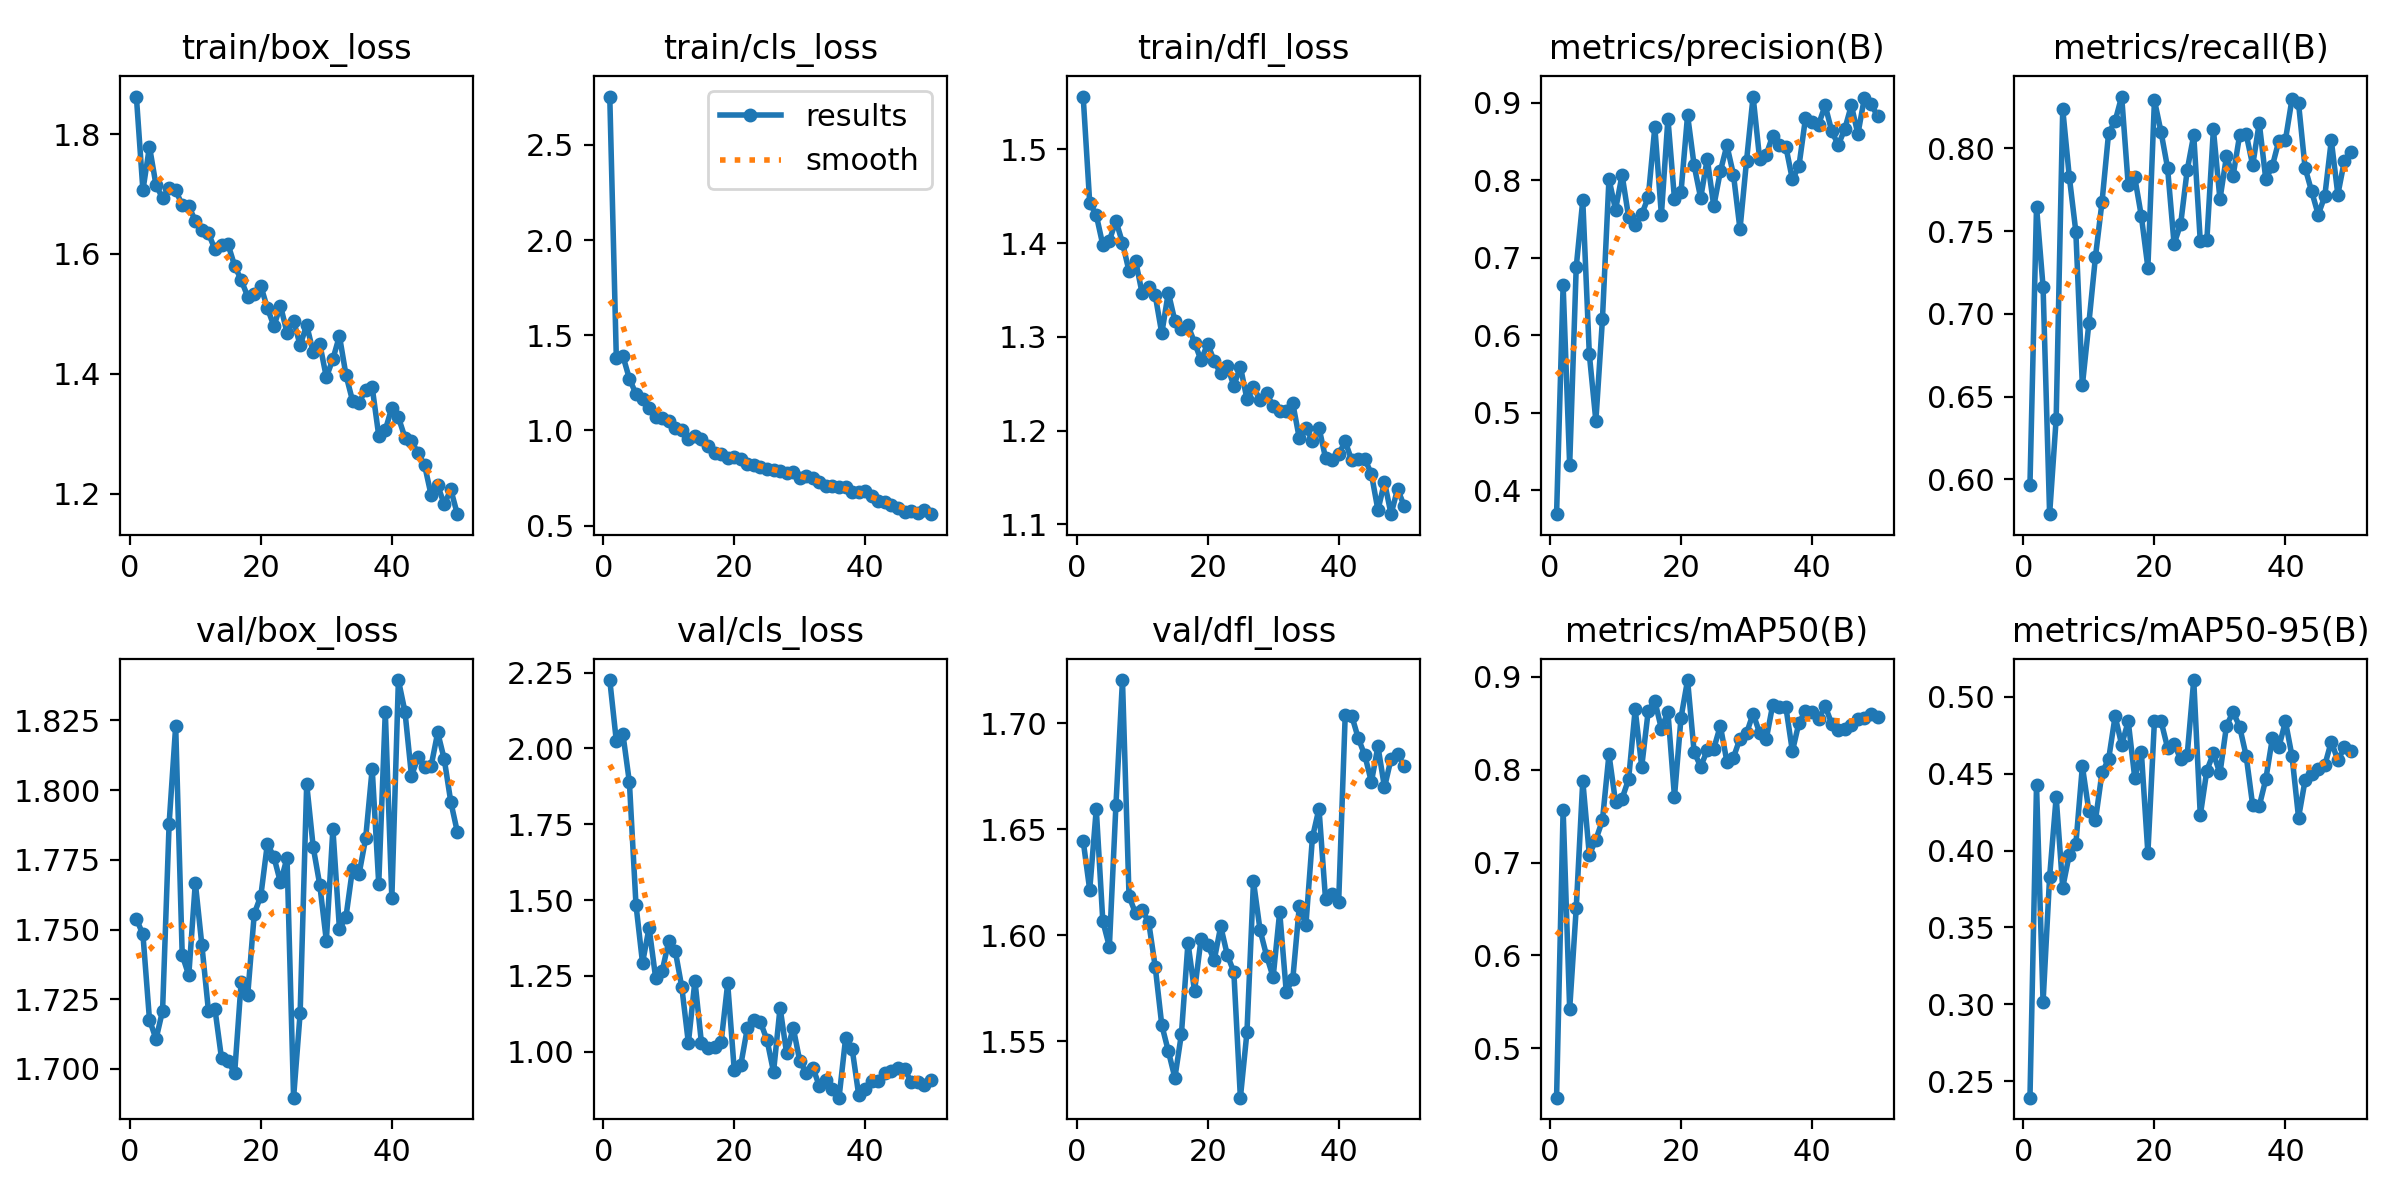

In [ ]:
%cd /content/drive/MyDrive/fruitdatasets
Image(filename=f'/content/drive/MyDrive/fruitdatasets/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/fruitdatasets


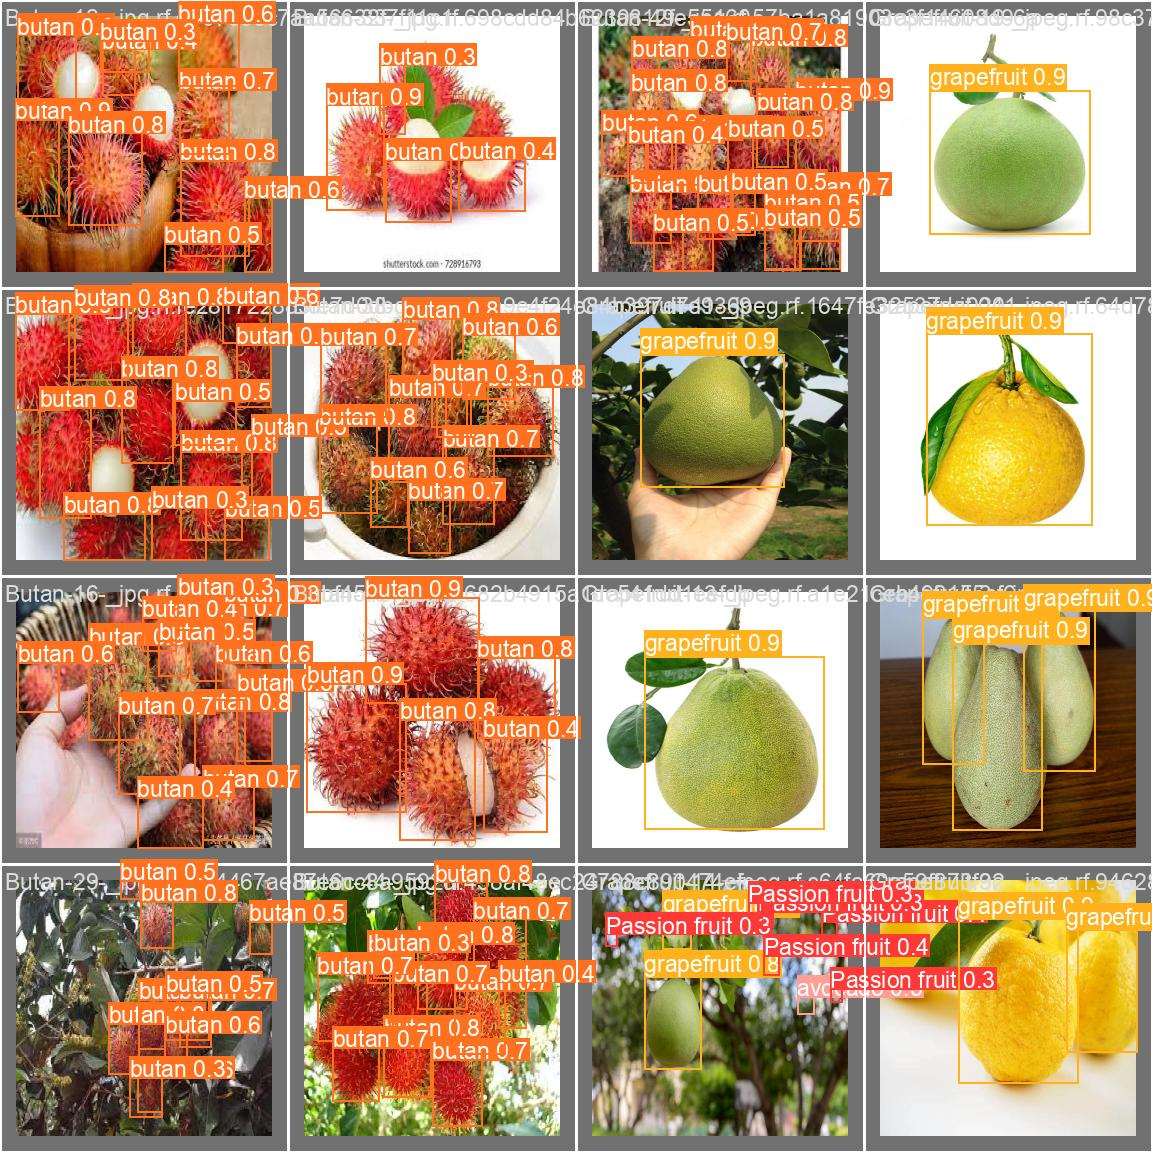

In [ ]:
%cd /content/drive/MyDrive/fruitdatasets
Image(filename=f'/content/drive/MyDrive/fruitdatasets/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd /content/drive/MyDrive/fruitdatasets
import subprocess
command ="!yolo task=detect mode=val model=/content/drive/MyDrive/fruitdatasets/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/fruitdatasets/fruit-3/data.yaml"
output = subprocess.getoutput(command)

with open('acc.txt', 'w') as file:
    file.write(output)

/content/drive/MyDrive/fruitdatasets


In [ ]:
%cd /content/drive/MyDrive/fruitdatasets
!yolo task=detect mode=predict model=/content/drive/MyDrive/fruitdatasets/runs/detect/train/weights/best.pt conf=0.55 source=/content/drive/MyDrive/fruitdatasets/fruit-3/test/images save=True


/content/drive/MyDrive/fruitdatasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

image 1/23 /content/drive/MyDrive/fruitdatasets/fruit-3/test/images/Butan-26-_jpg.rf.9df14979f7ddaadabe655bf0eb59edc6.jpg: 256x256 20 butans, 10.5ms
image 2/23 /content/drive/MyDrive/fruitdatasets/fruit-3/test/images/Butan-28-_jpg.rf.dacff7ed8f50b230246b7599dd976cbd.jpg: 256x256 8 butans, 7.5ms
image 3/23 /content/drive/MyDrive/fruitdatasets/fruit-3/test/images/Butan-30-_jpg.rf.c121aeb8e15796cb3548b4f7194e5dee.jpg: 256x256 3 butans, 7.3ms
image 4/23 /content/drive/MyDrive/fruitdatasets/fruit-3/test/images/Butan-45-_jpg.rf.6cfdeabb3b2d79475717450843542b9c.jpg: 256x256 8 butans, 7.9ms
image 5/23 /content/drive/MyDrive/fruitdatasets/fruit-3/test/images/Butan-47-_jpg.rf.7769c2901211860c84e2ed34730e2392.jpg: 256x256 13 butans, 7.3ms
image 6/23 /content/drive/MyDrive/fruitdatasets/fruit-3

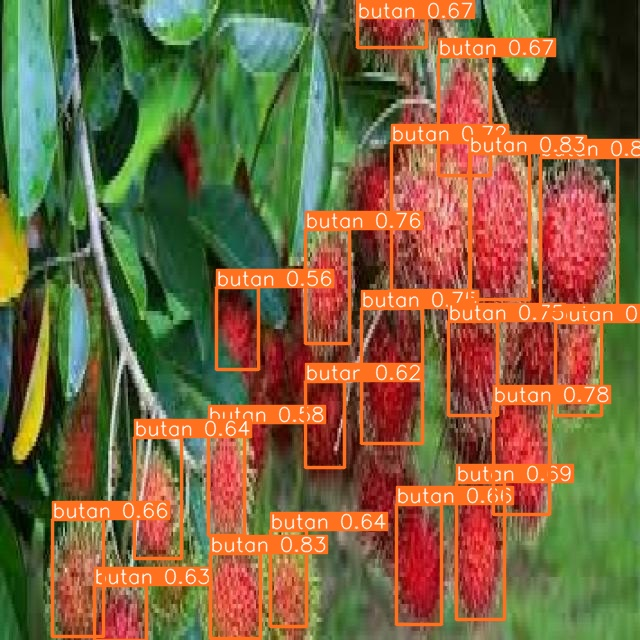

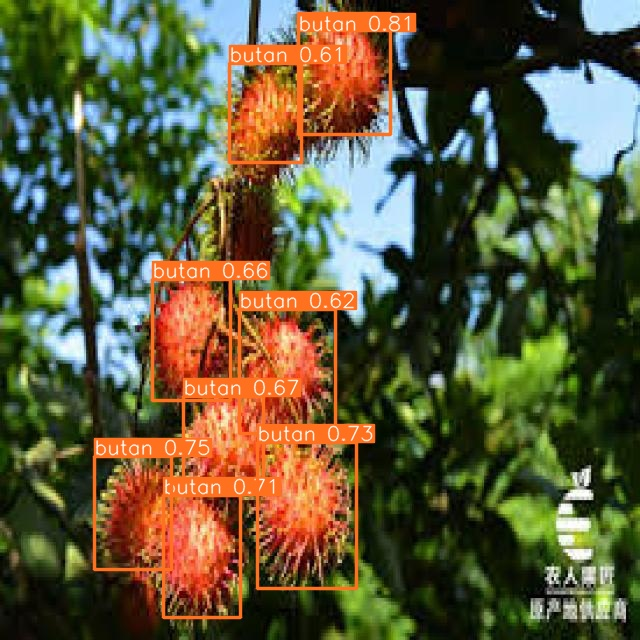

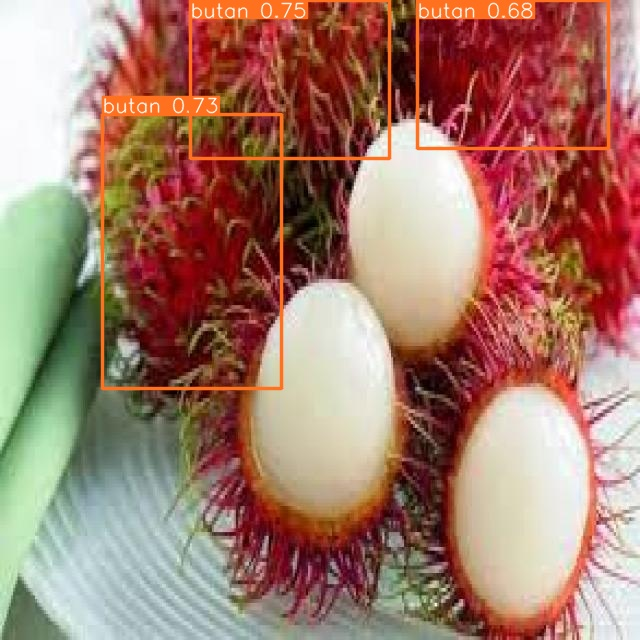

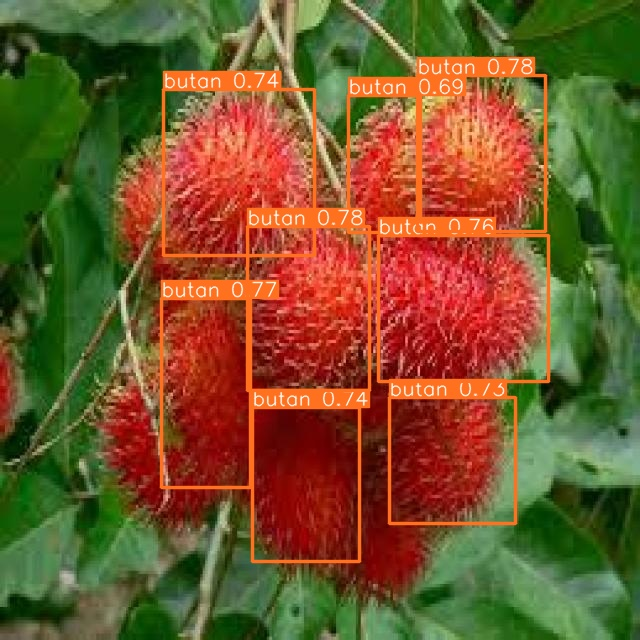

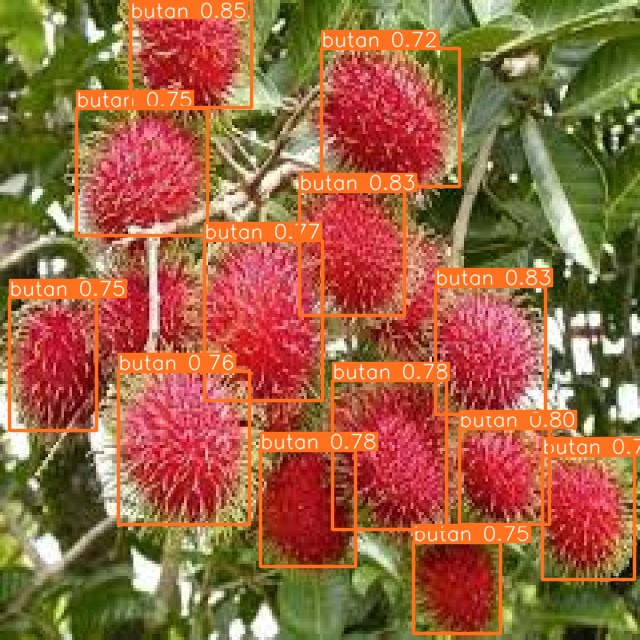

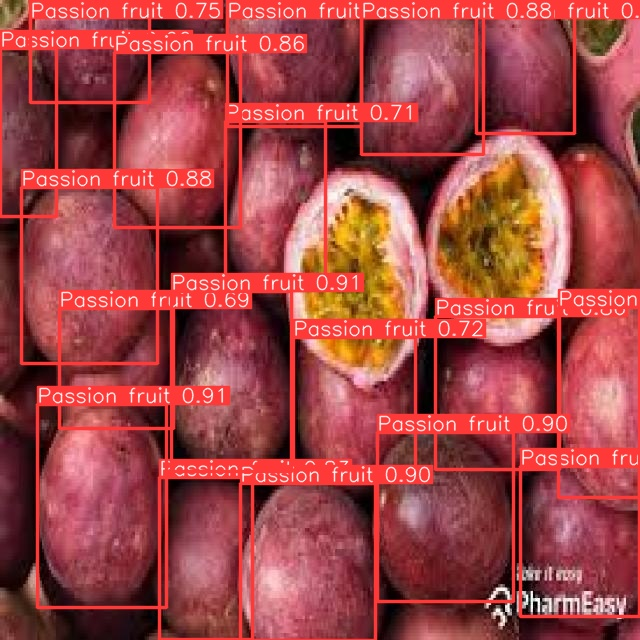

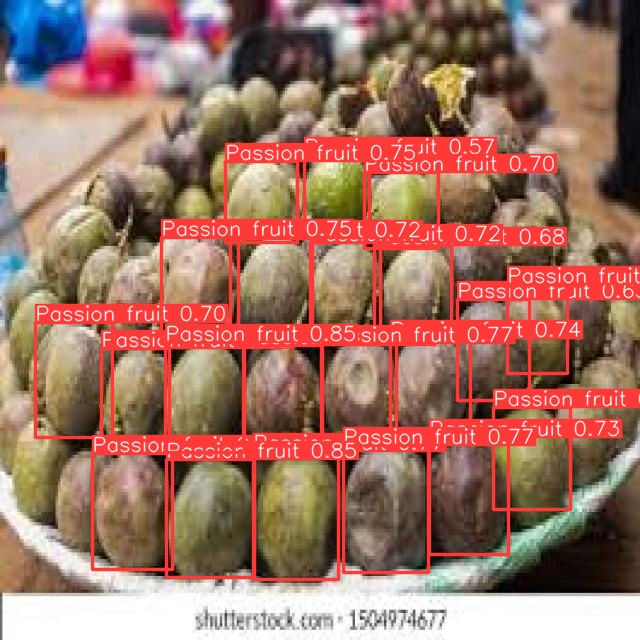

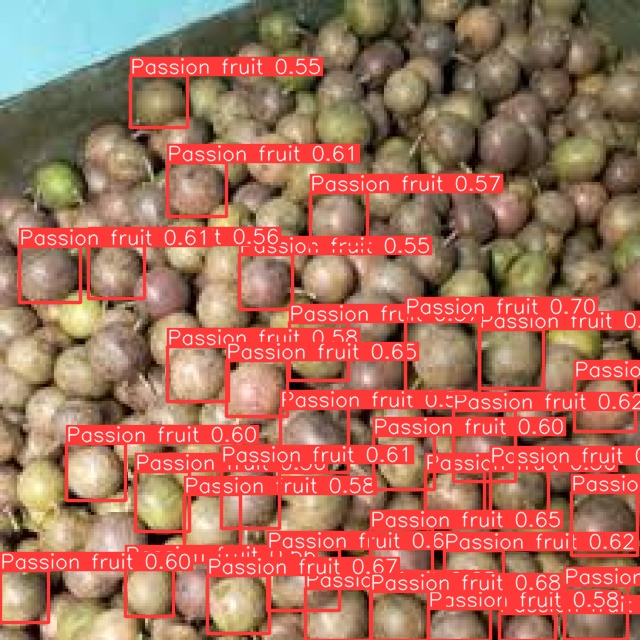

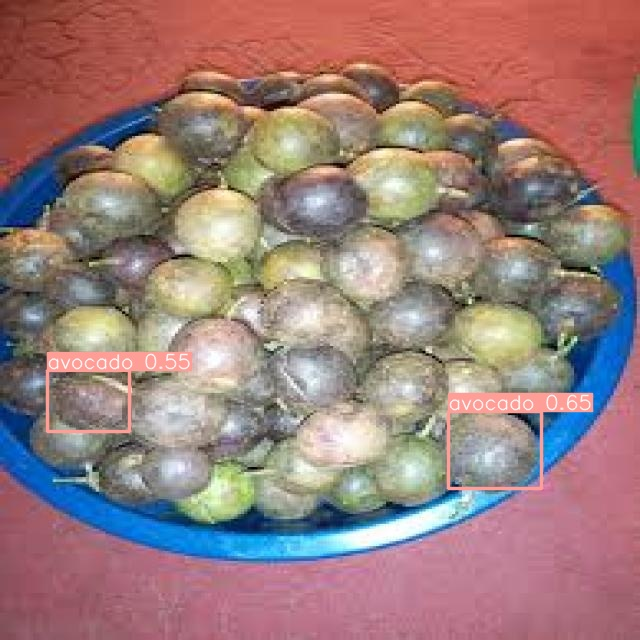

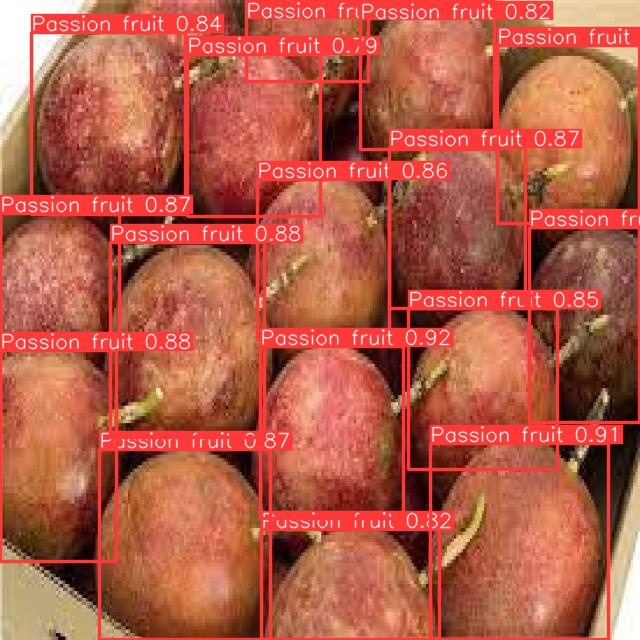

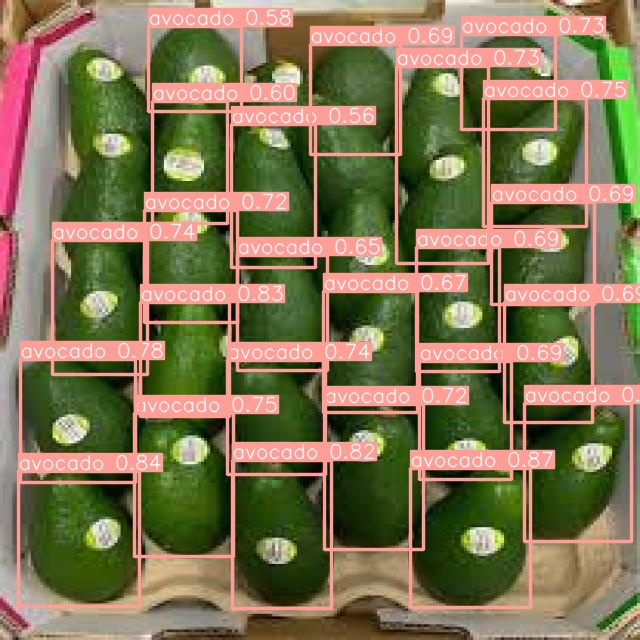

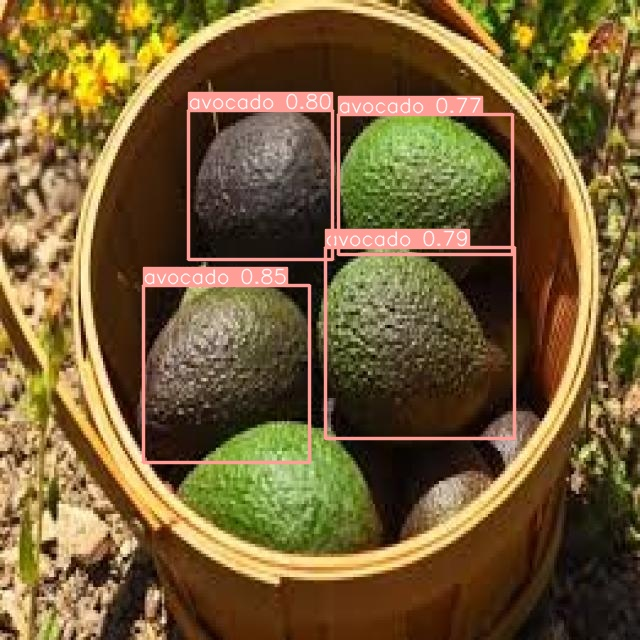

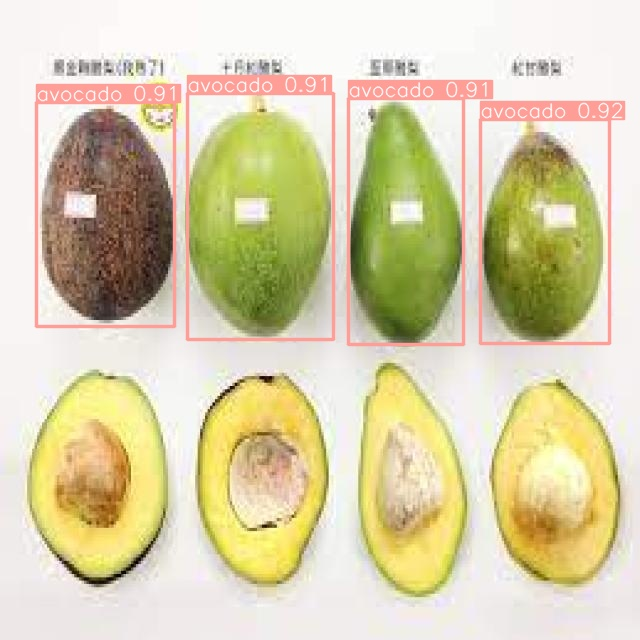

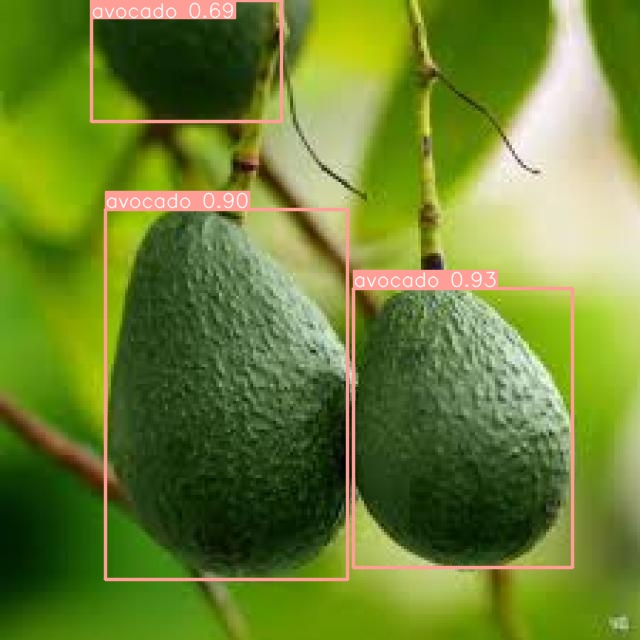

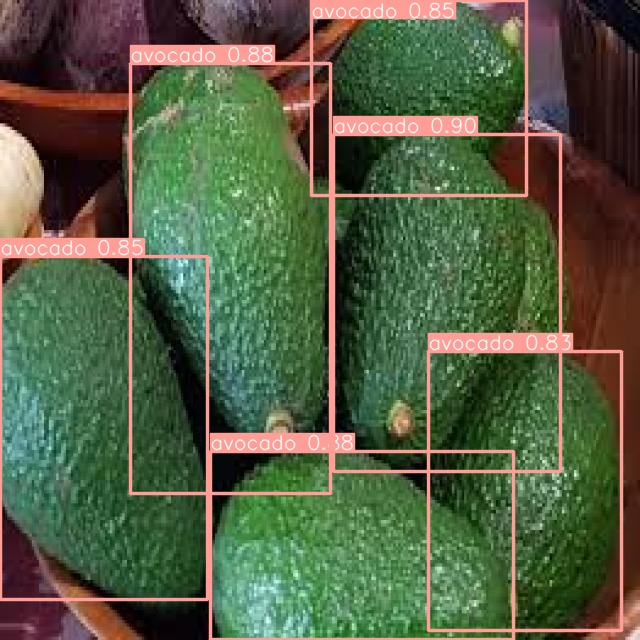

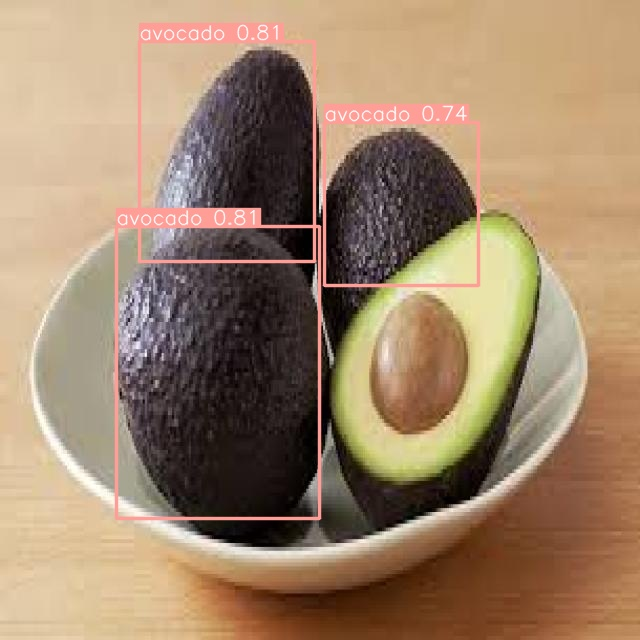

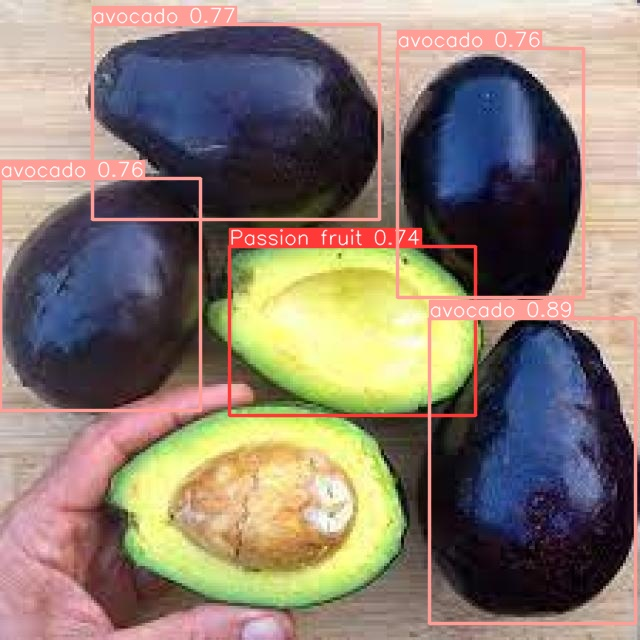

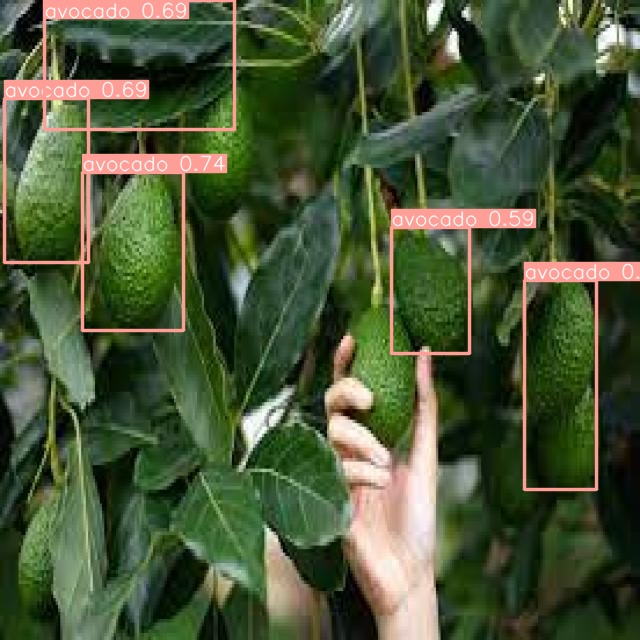

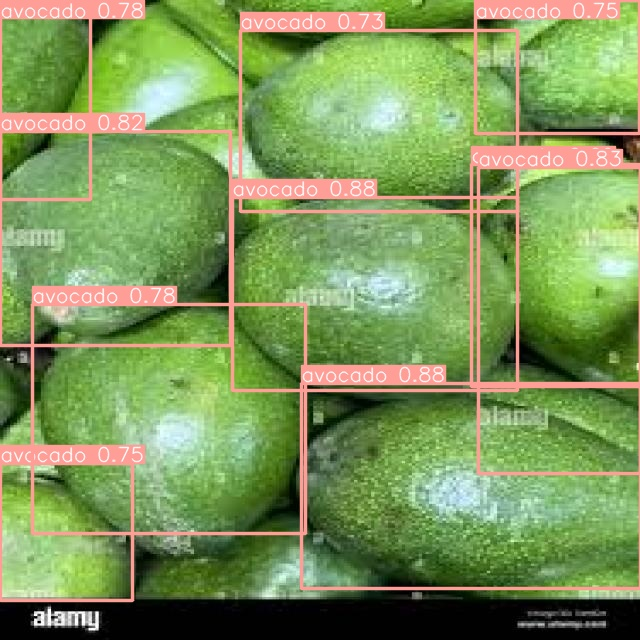

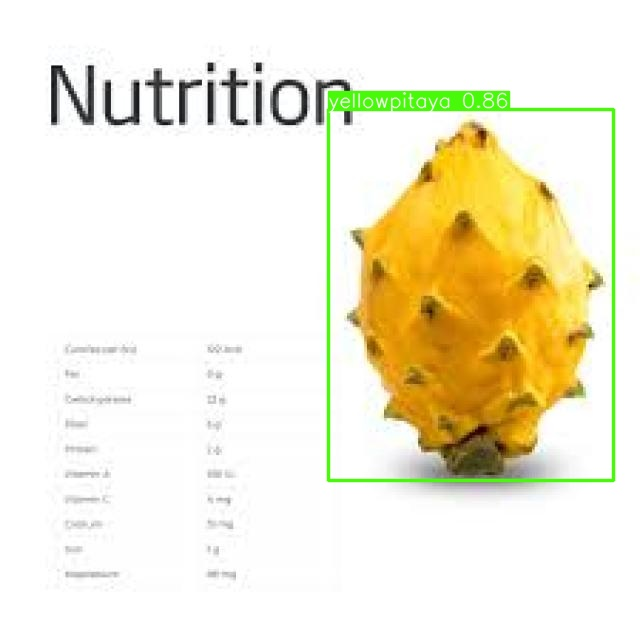

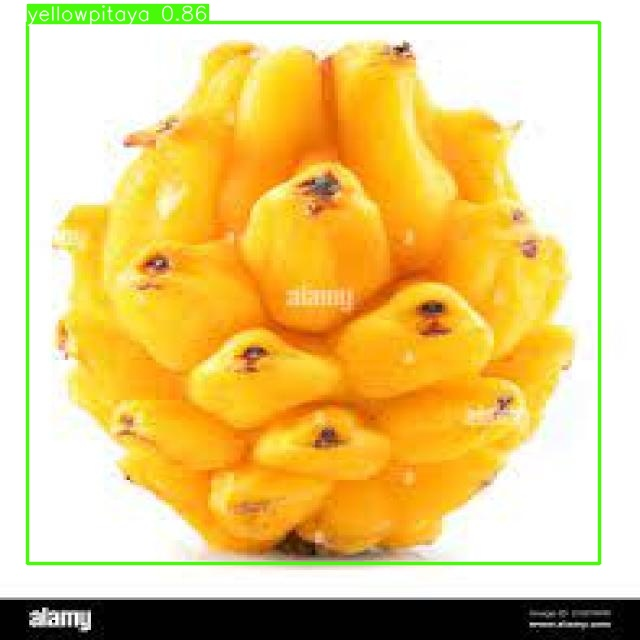

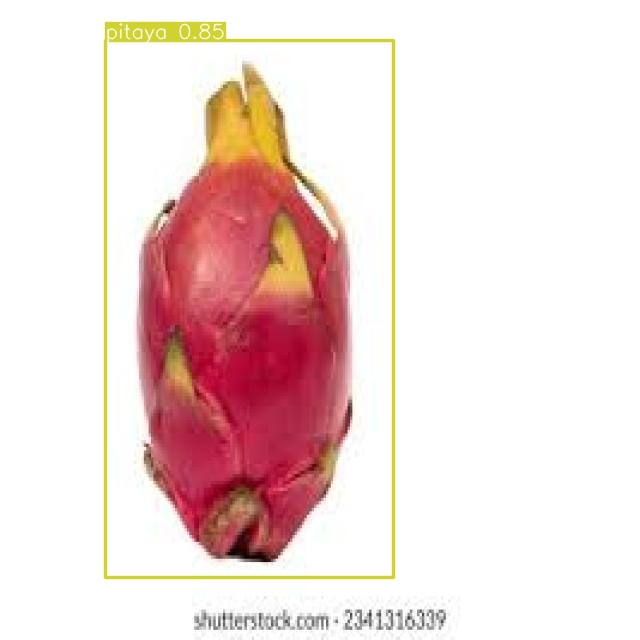

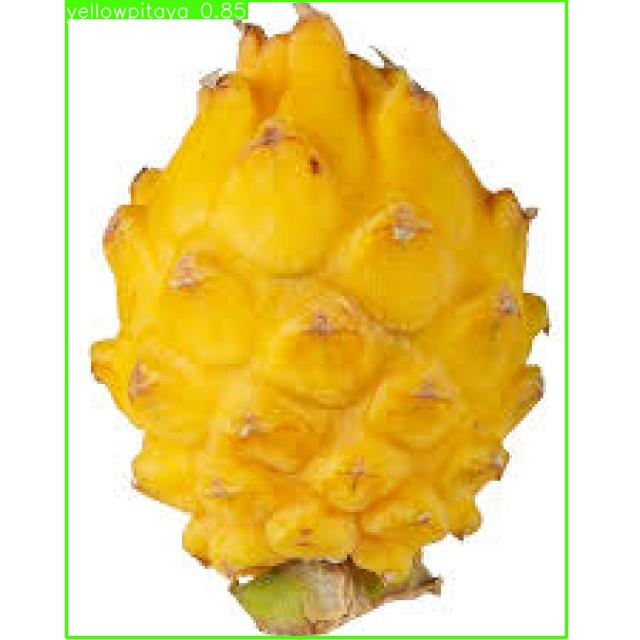

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/fruitdatasets/runs/detect/predict/*.jpg')[:999]:
      display(Image(filename=image_path, width=600))
      print("\n")